# Analyzing Movie Reviews
## Background
This project uses descriptive statsitics to compare the movie reviews generated by various online movie databases, namely: RottenTomatoes, Metacritics, IMDB, and Fandango

In [108]:
# setup environment
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import linregress
pd.set_option('max_columns', 99)

In [2]:
# import data
movies = pd.read_csv('fandango_score_comparison.csv')

In [11]:
# inspect loaded dataframe
print(movies.shape)
movies.head(5)

(146, 22)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


## Observations
Within the dataframe, we have 146 movies, each with 21 metrics, ranging from the movies' original scores from each database site, the normalized scores, the rounded normalized scores, and the number of votes obtained.
___
Let us first compare the distributions from two of the attributes:
- `Metacritic_norm_round`
- `Fandango_Stars`

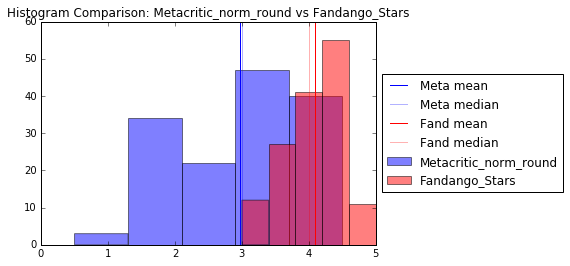

In [76]:
# inspect the distribution of 'Metacritic_norm_round'
plt.hist(movies['Metacritic_norm_round'],bins=5,color='blue',alpha=0.5,label='Metacritic_norm_round')
plt.hist(movies['Fandango_Stars'],bins=5,color='red',alpha=0.5,label='Fandango_Stars')
plt.title('Histogram Comparison: Metacritic_norm_round vs Fandango_Stars')
plt.xlim(0,5)
plt.ylim(0,60)
plt.axvline(movies['Metacritic_norm_round'].mean(),color='blue',label='Meta mean')
plt.axvline(movies['Metacritic_norm_round'].median(),color='blue',alpha=0.3,label='Meta median')
plt.axvline(movies['Fandango_Stars'].mean(),color='red',label='Fand mean')
plt.axvline(movies['Fandango_Stars'].median(),color='red',alpha=0.3,label='Fand median')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

## Observations
From the chart, it is clear that the two set of scores exhibit very different stories.

The key differences:
- Fandango scores have a higher average
- Fandango scores are more concentrated around its average
- Fandango scores have a smaller range: ~3 to 5 (Metacritic ~0.5 to 4.5)
- Fandango scores have a small gap between its average and median score
___
Let us further investigate these differences with descriptive statistics.

In [81]:
# calculate the means, medians, and standard deviations
mean_fandango_stars = movies['Fandango_Stars'].mean()
mean_metacritic_norm_round = movies['Metacritic_norm_round'].mean()
med_fandango_stars = movies['Fandango_Stars'].median()
med_metacritic_norm_round = movies['Metacritic_norm_round'].median()
std_fandango_stars = np.std(movies['Fandango_Stars'])
std_metacritic_norm_round = np.std(movies['Metacritic_norm_round'])

print('Mean of Fandango_Stars: {}'.format(mean_fandango_stars))
print('Mean of Metacritic_norm_round: {}'.format(mean_metacritic_norm_round))
print('Median of Fandango_Stars: {}'.format(med_fandango_stars))
print('Median of Metacritic_norm_round: {}'.format(med_metacritic_norm_round))
print('STD of Fandango_Stars: {}'.format(std_fandango_stars))
print('STD of Metacritic_norm_round: {}'.format(std_metacritic_norm_round))

Mean of Fandango_Stars: 4.089041095890411
Mean of Metacritic_norm_round: 2.9726027397260273
Median of Fandango_Stars: 4.0
Median of Metacritic_norm_round: 3.0
STD of Fandango_Stars: 0.5385321612699531
STD of Metacritic_norm_round: 0.9875610297038631


## Observations
The descriptive statistics confirm that the observations deduced from the chart were indeed correct. The mean and median of Fandango are higher, and the standard deviation is smaller.

The combinations confirm what the chart shows - the distribution of Fandango ratings is more concentrated (smaller STD) and has higher values (larger mean/median) than those of the Metacritic.

What could cause these disparities?

After doing some researches online, it is found that Fandango approaches its ratings with an unique twist: it rounds the ratings up instead of rounding them to the nearest 0.5 mark.

Such methodology would, undoubtly, inflat the ratings across the board.
___
Let's investigate the differences further...

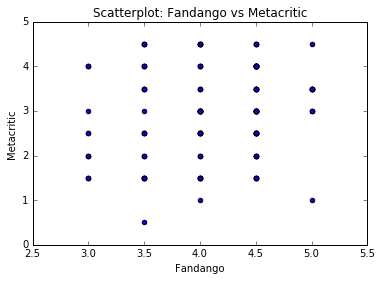

In [84]:
plt.scatter(x=movies['Fandango_Stars'],y=movies['Metacritic_norm_round'])
plt.xlabel('Fandango')
plt.ylabel('Metacritic')
plt.title('Scatterplot: Fandango vs Metacritic')

## Observations
The chart shows that there are movies where they were given low ratings by Metacritic, but were given high ratings by Fandango. This group of movies can be found in the bottom right quadrant of the chart.

Similarly, another group of movies were given high ratings by Metacritic, but were given low ratings by Fandango. These movies can be found in the upper left quadrant of the chart.
___
Let us investigate further by calculating the quantitative differences between the two dataset for each movie, and find the top 5 movies by this metric.

In [89]:
# calculate the difference and take its absolute value
movies['fm_diff'] = abs(movies['Metacritic_norm_round'] - movies['Fandango_Stars'])

In [100]:
# sort the dataframe based on the difference, in descending order
movies = movies.sort_values('fm_diff', ascending=False)

# display the top 5 movies with biggest difference
movies[['FILM','Metacritic_norm_round','Fandango_Stars','fm_diff']].head(5)

,FILM,Metacritic_norm_round,Fandango_Stars,fm_diff
3,Do You Believe? (2015),1.0,5.0,4.0
15,Taken 3 (2015),1.5,4.5,3.0
85,Little Boy (2015),1.5,4.5,3.0
47,Annie (2014),1.5,4.5,3.0
19,Pixels (2015),1.5,4.5,3.0


___
Let us investigate further by the mean of correlations between these two sets of  ratings

In [106]:
corr = pearsonr(movies['Fandango_Stars'],movies['Metacritic_norm_round'])
print('r value: {}\np value: {}'.format(corr[0],corr[1]))

r value: 0.17844919073895918
p value: 0.031161516228523815


## Observations
The two sets of ratings have a correlation of 0.178. It means that the sets move in the same direction, but it is a rather weak correlation.

In other words, when a movie received a positive rating from Metacritic, it will probably also receive a positive rating from Fandango. However, given the low r-value, the two sets of data are not very similar in how they behave.
___
Let us use linear regression to predict the rating a movie would receive from Fandango given its score from Metacritic.

In [110]:
linear_regression = linregress(movies['Metacritic_norm_round'],movies['Fandango_Stars'])
print('Slope: {}\nIntercept: {}'.format(linear_regression[0],linear_regression[1]))

Slope: 0.09731107797392835
Intercept: 3.799773918899419


We have calculated that the linear regression would have a slope of 0.097 with an intercept of 3.800. Thus, the formulat would be:

`Fandango_Stars = 0.097 * Metacritic_norm_round + 3.800`

Let us assume a movie received a rating of 3 from Metacritic...

In [118]:
# create a function that would take in a Metacritic score
# and output the predicted Fandango Star
def predict(meta):
    predicted = linear_regression[0] * meta + linear_regression[1]
    return print('Predicted Fandango Stars, given a Metacritic rating of {}: {}'.format(meta,predicted))

In [119]:
# predict a movie that received a 3 from Metacritic
predict(3)

# predict a movie that received a 1 from Metacritic
predict(1)

# predict a movie that received a 5 from Metacritic
predict(5)

Predicted Fandango Stars, given a Metacritic rating of 3: 4.091707152821204
Predicted Fandango Stars, given a Metacritic rating of 1: 3.897084996873347
Predicted Fandango Stars, given a Metacritic rating of 5: 4.28632930876906


Let us draw the linear regression in comparison to the scatterplot with the two sets of ratings...

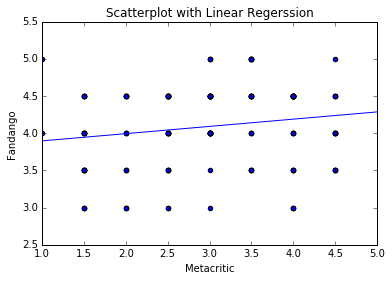

In [124]:
plt.scatter(movies['Metacritic_norm_round'],movies['Fandango_Stars'])
plt.plot([1,5],[3.897,4.286])
plt.xlim(1,5)
plt.xlabel('Metacritic')
plt.ylabel('Fandango')
plt.title('Scatterplot with Linear Regerssion')
plt.show()